In [1]:
## Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#Checking for null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
# Number of rows and columns
df.shape

(1338, 7)

In [5]:
## Getting some information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# Statistical analysis of the data
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


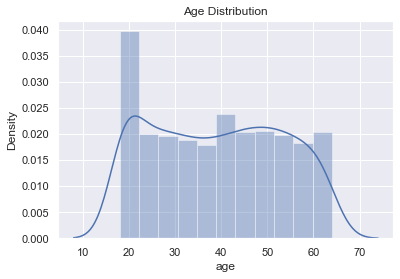

In [7]:
## Distribution of age value
sns.set()
sns.distplot(df['age'])
plt.title("Age Distribution")
plt.show()

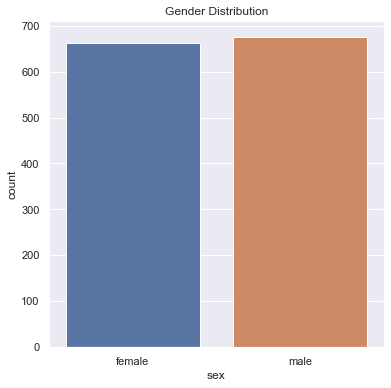

In [8]:
# Countplot for gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=df)
plt.title('Gender Distribution')
plt.show()

In [9]:
# We can check count by value counts method also
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

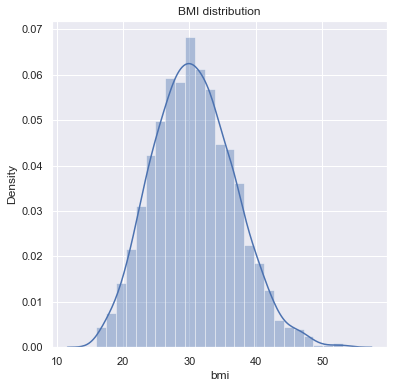

In [10]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI distribution')
plt.show()

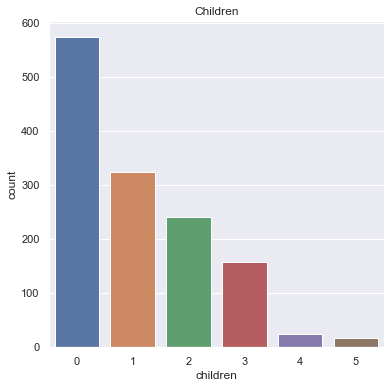

In [11]:
## Children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=df)
plt.title('Children')
plt.show()

In [12]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

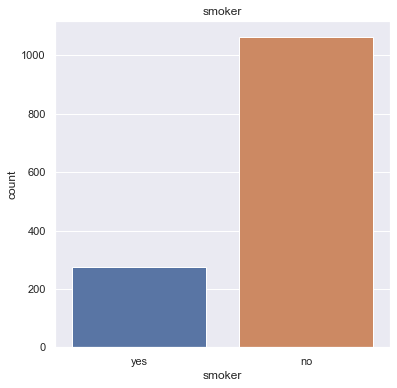

In [13]:
#Smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=df)
plt.title('smoker')
plt.show()

In [14]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

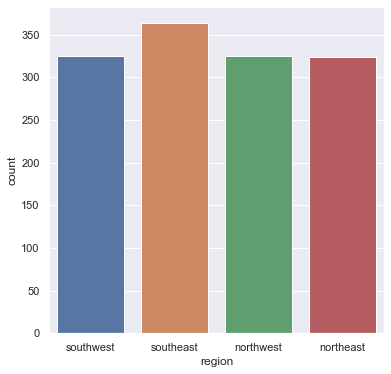

In [15]:
# visualization of Region column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=df)
plt.show()

In [16]:
# check for count of regions
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

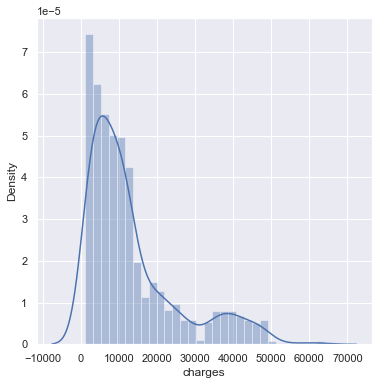

In [17]:
## distribution of charges column
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.show()

Encoding the categotrical features

In [18]:
df.replace({'sex':{'male':1,'female':0},'smoker':{'yes':1,'no':0},'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [20]:
## splitting the features and target
x=df.drop('charges',axis=1)
Y=df['charges']

In [21]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,0
2,28,1,33.000,3,0,0
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3


In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [23]:
X=pd.DataFrame(sc.fit_transform(x),columns=x.columns)

In [24]:
X.head()

,age,sex,bmi,children,smoker,region
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,-0.403289
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,-1.287881
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,-1.287881
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,1.365894
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,1.365894


In [25]:
## Splitting the data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.2,random_state=42)

In [26]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(1070, 6) (1070,) (268, 6) (268,)


Model training

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

Model Evaluation

In [29]:
from sklearn.metrics import r2_score
pred=lr.predict(x_test)
print(r2_score(y_test,pred))

0.783021587162344


In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
print(cross_val_score(lr,X,Y,cv=5,scoring='r2').mean())

0.7470257759641311


In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
predrf=rfr.predict(x_test)
print(r2_score(y_test,predrf))

0.8665443256228191


In [34]:
print(cross_val_score(rfr,X,Y,cv=5,scoring='r2').mean())

0.8363104216298336


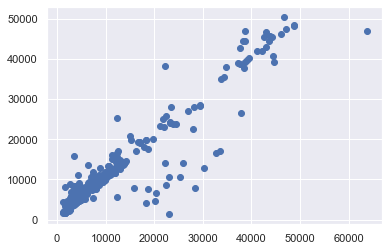

In [35]:
plt.scatter(y_test,predrf)

Random Forest regressor is the best fit model

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
estimator=RandomForestRegressor()
para_grids={"n_estimators":[10,20,30,50,80,100],
             "max_features":["auto","log2","sqrt"],
              "bootstrap":[True,False]}
grid=GridSearchCV(estimator,para_grids,scoring="r2")
grid.fit(x_train,y_train)
forest=grid.best_estimator_
predictions=forest.predict(x_test)
print(grid.best_score_,grid.best_params_)

0.8324791318733492 {'bootstrap': True, 'max_features': 'log2', 'n_estimators': 80}


In [38]:
model=RandomForestRegressor(bootstrap=True,max_features='sqrt',n_estimators=80)
model.fit(x_train,y_train)
predmodel=model.predict(x_test)
print(r2_score(y_test,predmodel))

0.8613776145321244


Accuracy improved by hyper parameter tuning technique

# Saving the model

In [39]:
import pickle

In [40]:
file=open("medical cost prediction.pkl","wb")
pickle.dump(model,file)
file.close()

In [41]:
predictmodel=pickle.load(open("medical cost prediction.pkl","rb"))
predictions=predictmodel.predict(x_test)
print(predictions)

[12732.64685375  6546.71219406 28306.63529587 11604.27960338
 32104.470678    9376.89435363  2880.65188725 15504.23513362
  6058.19660525 11663.007359   18966.46800562  8810.2864875
  4230.2144125  40419.62456775 45337.42802087 39913.125471
 11456.312439   41456.28934913  8782.76608562 23456.64402687
  5942.27011188 10213.56648888  2266.05298762  4464.671361
 12287.55611837 12340.84979462 13840.03243525  6164.09363325
 10446.14218262  3724.9364971   7626.4037355  11975.5895975
  3403.02928587  6303.99344625  4936.66363508 11237.60465187
  3563.25756913  8218.6399     23804.53677813 39487.98331163
  6124.116001    3943.01694087 13438.81961012 13605.43193275
  6834.45783063 12925.88245838 16604.90589312  5643.521414
 39251.28894687  6185.87677425 15222.95173575  2212.31352225
  7386.8083755   2169.49048725 13509.47453887 12780.43340038
  3300.20865687 39044.86780562 11810.27646188 13315.88231825
 13901.05304163  6365.27884987 16608.31401075  9110.8128805
 10923.57672988  6684.54402012 19